In [348]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [349]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [350]:
### Brittany
# Using sqlalchemy to connect with hawaii.sqlite database
# Leveraging db.MetaData() to automatically reflect the database
# Found a simplier solution online because I couldn't get session.query working properly
###

import sqlalchemy as db
from sqlalchemy import desc
engine = db.create_engine('sqlite:///Resources/hawaii.sqlite')
connection = engine.connect()
metadata = db.MetaData()

In [351]:
# Creating Tables

M = db.Table('measurement', metadata, autoload=True, autoload_with=engine)
S = db.Table('station', metadata, autoload=True, autoload_with=engine)

In [352]:
# Verifying columns

print(M.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [353]:
# Verifying columns

print(S.columns.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [354]:
# Verifying datatypes

# print(repr(metadata.tables['measurement']))


# Exploratory Climate Analysis


In [355]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query = db.select([M]).order_by(db.desc(M.columns.id)).limit(365)
one_year = connection.execute(query).fetchall()
one_year

[(19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (19545, 'USC00516128', '2017-08-18', None, 76.0),
 (19544, 'USC00516128', '2017-08-17', 0.13, 72.0),
 (19543, 'USC00516128', '2017-08-16', 0.42, 71.0),
 (19542, 'USC00516128', '2017-08-15', 0.42, 70.0),
 (19541, 'USC00516128', '2017-08-14', 0.22, 79.0),
 (19540, 'USC00516128', '2017-08-13', None, 80.0),
 (19539, 'USC00516128', '2017-08-12', 0.14, 74.0),
 (19538, 'USC00516128', '2017-08-11', None, 72.0),
 (19537, 'USC00516128', '2017-08-10', 0.07, 75.0),
 (19536, 'USC00516128', '2017-08-09', 0.15, 71.0),
 (19535, 'USC00516128', '2017-08-08', 0.34, 74.0),
 (19534, 'USC00516128', '2017-08-07', 0.05, 78.0),
 (19533, 'USC00516128', '2017-08-06', None, 79.0),
 (19532, 'USC00516128', '2017-08-05', None, 77.0),
 (19531, 'USC00516128', '2017-08

In [356]:
# Calculate the date 1 year ago from the last data point in the database

year_ago = date(2017, 8, 23) - timedelta(days = 365)
print(Year_ago)

2016-08-23


In [357]:
# Perform a query to retrieve the data and precipitation scores

query = db.select([M.columns.date, M.columns.prcp]).where(M.columns.date >= year_ago)
precip = connection.execute(query).fetchall()
precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [358]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(precip, columns = ['date', 'precipitation'])
df.set_index(df['date'], inplace=True)


# Sort the dataframe by date

df = df.sort_index()
df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


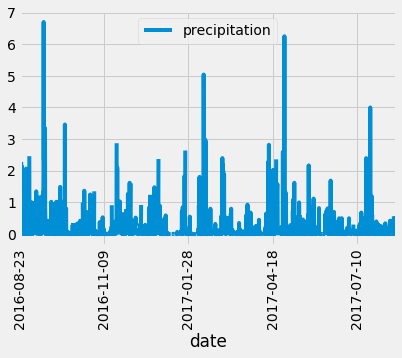

In [359]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=90)

In [360]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [361]:
# Design a query to show how many stations are available in this dataset?

query = db.select([db.func.count(S.columns.station)])
station_count = connection.execute(query).fetchall()

print(station_count)

[(9,)]


In [362]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Brittany
# Tried for hours to get this to order_by. Can't figure out what I'm doing wrong

column = S.columns.station
count_stations = db.func.count(S.columns.station)

query = db.select([column, count_stations]).group_by(column).order_by(count_stations.desc())

active_station = connection.execute(query).fetchall()

print(active_station)

[('USC00519523', 1), ('USC00519397', 1), ('USC00519281', 1), ('USC00518838', 1), ('USC00517948', 1), ('USC00516128', 1), ('USC00514830', 1), ('USC00513117', 1), ('USC00511918', 1)]


In [363]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query = db.select([db.func.min(M.columns.tobs), db.func.max(M.columns.tobs), db.func.avg(M.columns.tobs)]).\
    where(M.columns.station == 'USC00519281')

low_high_avg = connection.execute(query).fetchall()

print(low_high_avg)

[(54.0, 85.0, 71.66378066378067)]


In [373]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = db.select([M.columns.tobs]).\
    where(db.and_(M.columns.station == 'USC00519281', M.columns.date >= year_ago))

df = pd.DataFrame(, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

ValueError: DataFrame constructor not properly called!